## Observations and Insights 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged = mouse_metadata.merge(study_results, on='Mouse ID')
# Display the data table for preview
merged.to_csv("data/merged.csv", index=False)

In [39]:
# Checking the number of mice.
print("Number of mice", merged['Mouse ID'].nunique())


Number of mice 249


In [40]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged.loc[merged.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()


array(['g989'], dtype=object)

In [41]:
# Optional: Get all the data for the duplicate mouse ID. 



In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_clean = merged[~merged['Mouse ID'].isin(['g989'])]

In [43]:
# Checking the number of mice in the clean DataFrame.
print("Number of mice", merged_clean['Mouse ID'].nunique())

Number of mice 248


## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

regimen_mean = merged_clean.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean

regimen_median = merged_clean.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median

regimen_var = merged_clean.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_var

regimen_std = merged_clean.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = merged_clean.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem

summary_table = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_var, "Standard Deviation": regimen_std, "SEM": regimen_sem})
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_table_group_by = merged_clean.groupby('Drug Regimen')
summary_table_2 = summary_table_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_table_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

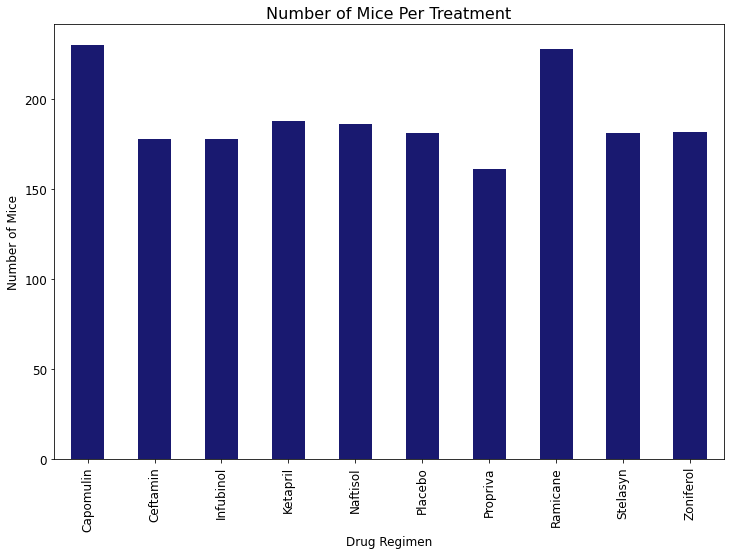

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [46]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_per_tm = merged.groupby(["Drug Regimen"]).count()["Mouse ID"] 


plot_pandas = mice_per_tm.plot.bar(figsize=(12,8), color='midnightblue',fontsize = 12)
mice_per_tm
plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Mice",fontsize = 12)
plt.title("Number of Mice Per Treatment",fontsize = 16)

plt.savefig("../mice_per_tm.png")
plt.show()

mice_per_tm

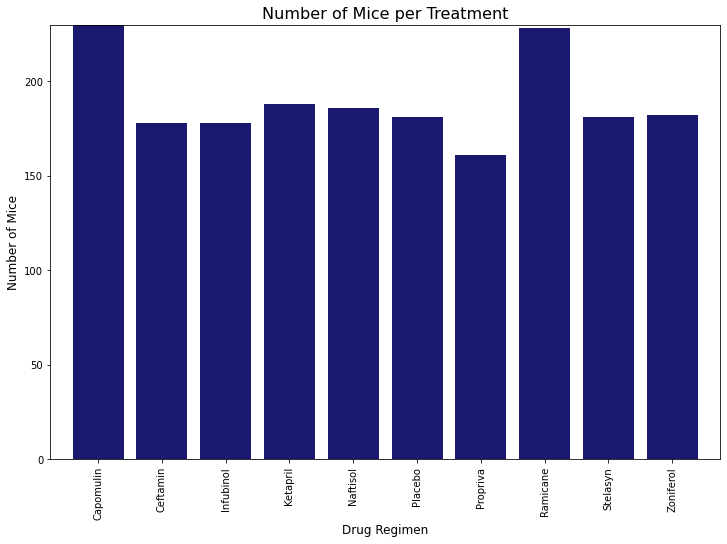

In [47]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(mice_per_tm))
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.bar(x_axis, mice_per_tm, color='midnightblue', align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(-0.25, max(mice_per_tm))

plt.title("Number of Mice per Treatment",fontsize = 16)
plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Mice",fontsize = 12)
plt.savefig("../.mice_per_tm_2.png")

<ipython-input-48-278bcf473ff4>:18: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis("equal",fontsize = 14)


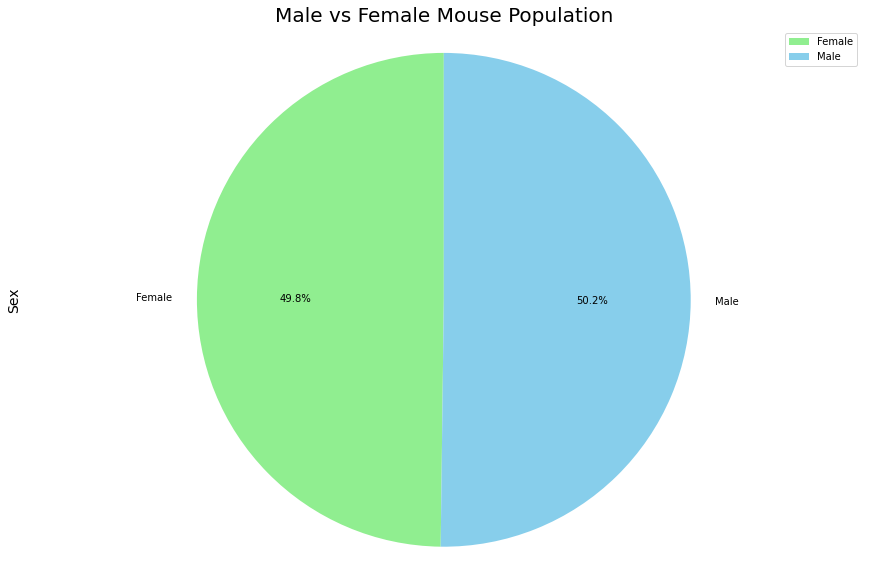

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = merged.groupby(["Mouse ID","Sex"])
gender_df = pd.DataFrame(gender_group.size())

gender_mouse = pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender_mouse.columns = ["Total Count"]

gender_mouse["Percentage of Sex"] = (100*(gender_mouse["Total Count"]/gender_mouse["Total Count"].sum()))
gender_mouse["Percentage of Sex"] = gender_mouse["Percentage of Sex"]

gender_mouse

colors = ['lightgreen', 'skyblue']
plot = gender_mouse.plot.pie(y="Total Count",figsize=(15,10), colors = colors, startangle=90, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal",fontsize = 14)

plt.savefig("../pie_pandas.png")
plt.show()


<ipython-input-49-a488eaf55323>:11: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis("equal",fontsize = 12)


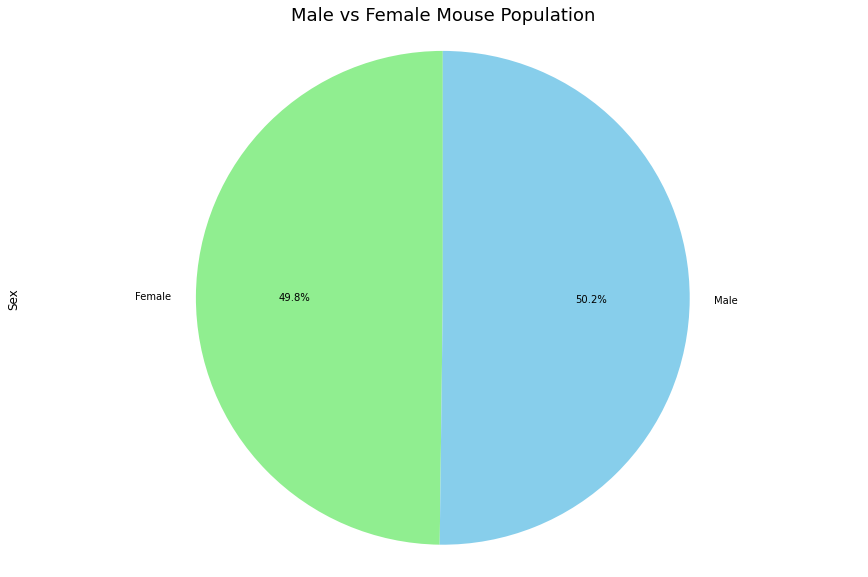

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]
sizes = [49.8,50.2]
colors = ['lightgreen', 'skyblue']

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population',fontsize = 18)
plt.ylabel('Sex',fontsize = 12)
plt.axis("equal",fontsize = 12)

plt.savefig("../pie_plot_2.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin = merged.loc[merged["Drug Regimen"] == "Capomulin",:]
Ramicane = merged.loc[merged["Drug Regimen"] == "Ramicane", :]
Infubinol = merged.loc[merged["Drug Regimen"] == "Infubinol", :]
Ceftamin = merged.loc[merged["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_vol, merged, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [55]:
Ramicane_last = Ramicane.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, merged, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [56]:
Infubinol_last = Infubinol.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, merged, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [58]:
Ceftamin_last = Ceftamin.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, merged, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [63]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:

    
# Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged.loc[merged["Drug Regimen"] == drug, 'Tumor Volume (mm3)']

    
# add subset 
    tumor_vol_list.append(final_tumor_vol)

    
    # Determine outliers using upper and lower bounds
quartiles = final_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
print(f"{drug}'s potential outliers: {outliers}")   

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [52]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

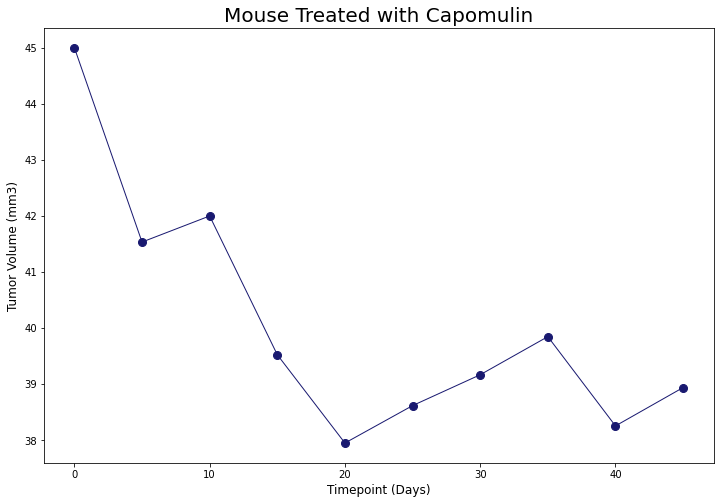

In [71]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_df = Capomulin.loc[Capomulin["Mouse ID"] == "b742",:]

x_axis = line_df["Timepoint"]
tumsiz = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.title('Mouse Treated with Capomulin',fontsize =20)
plt.plot(x_axis, tumsiz,linewidth=1, markersize=8,marker="o",color="midnightblue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =12)
plt.ylabel('Tumor Volume (mm3)',fontsize =12)


plt.savefig("../line_graph.png",)
plt.show()


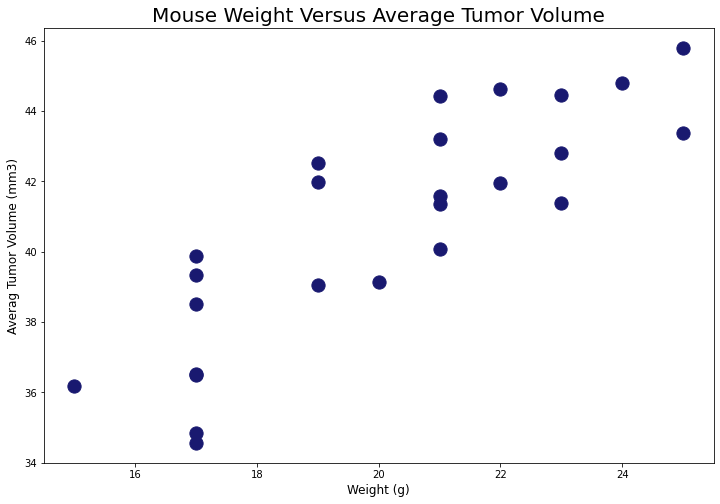

In [76]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(12, 8))
avg_capm_vol =Capomulin.groupby(['Mouse ID']).mean()

marker_size=8
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=175, color="midnightblue")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight (g)',fontsize =12)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =12)


plt.savefig("../scatterplot.png")
plt.show()

## Correlation and Regression

In [77]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")


The correlation between mouse weight and average tumor volume is 0.84
